# Computer Vision & Deep Learning - Generative AI & Visual Synthesis

# Exercise 4: Convolutional Neural Networks

**Due on 24.05.2024., 10:00**

## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.
-  Submission: Put your code and potentially other materials inside a single ZIP file. If you use jupyter notebooks, please always create a PDF file and include it in your ZIP file. The final submission should therefore be a **single zip** file with a **PDF of your code** and the **original code** inside. The ZIP file should contain your surname and your matriculation number (Surname-MatriculationNumber.zip). Submissions that fail to follow the naming convention will not be graded!

In [1]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as T

c:\Users\kutay\miniconda3\envs\deepl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
## Task 3: Convolutional Neural Networks

In the previous exercise, we already used the PyTorch framework to train a neural network classifier. Now, we want to move on to a more complex dataset than MNIST and use a Convolutional Neural Network for classification.

### Task 3.1: Dataset

In [2]:
dataset = torchvision.datasets.CIFAR10(root='data/', download=True)

Files already downloaded and verified


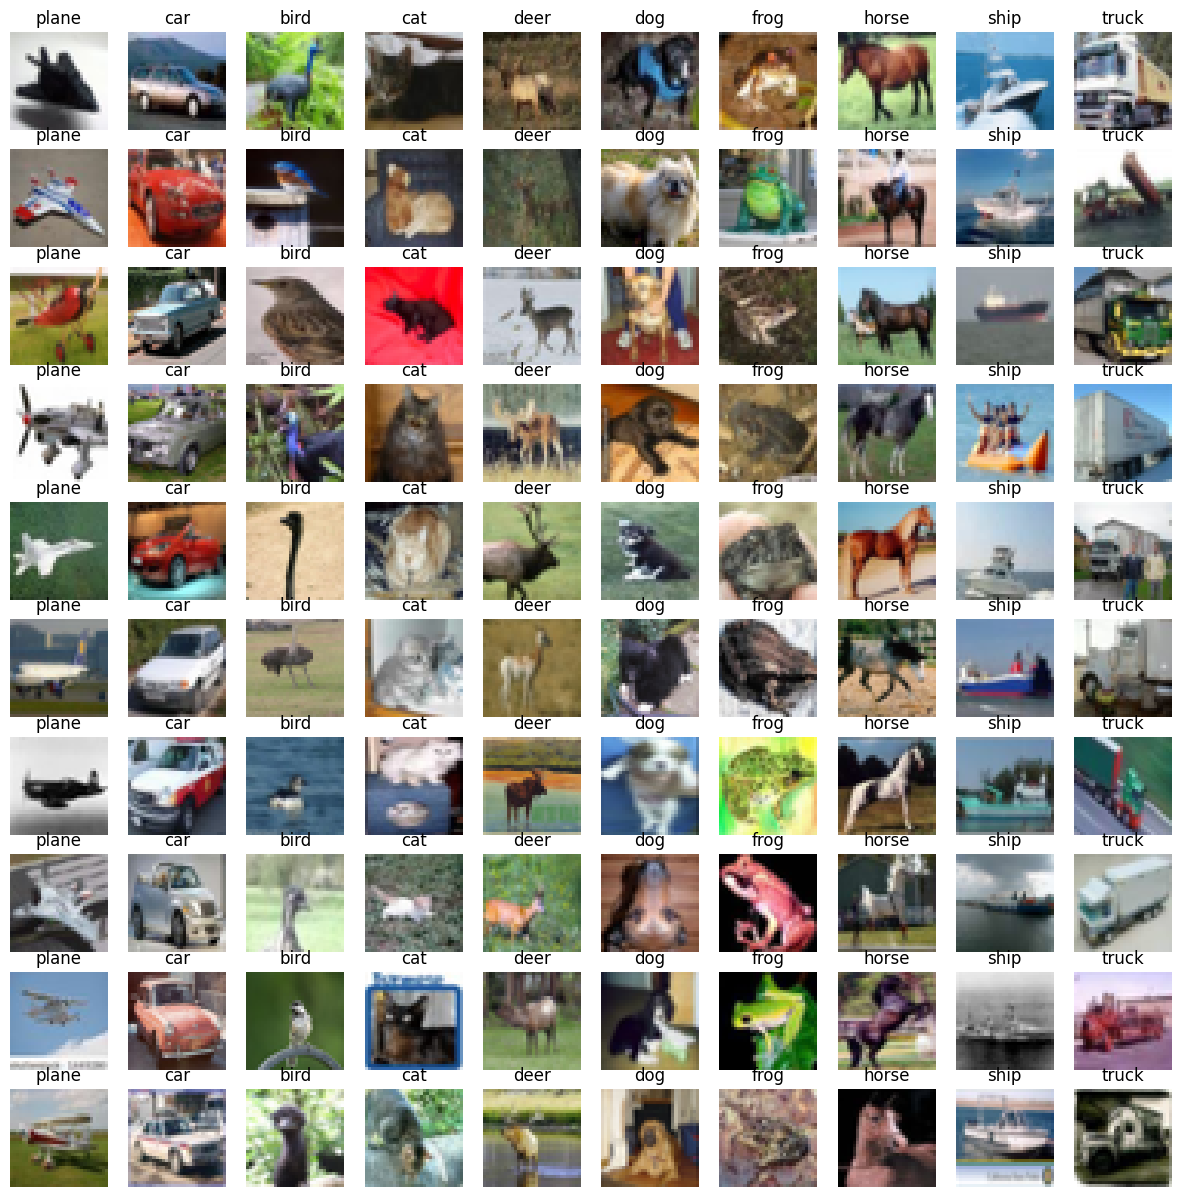

In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_images = {cls: [] for cls in classes}
for img, label in dataset:
    if len(class_images[classes[label]]) < 10:
        class_images[classes[label]].append(img)
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i, (cls, images) in enumerate(class_images.items()):
    for j, img in enumerate(images):
        axs[j, i].imshow(img)
        axs[j, i].axis('off')
        axs[j, i].set_title(cls)


### 3.2 Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=0, stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0, stride=1)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)

        return x

### 3.3 Training

In [5]:
def train(train_loader, test_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    num_epochs = 10

    train_accuracies= []
    test_accuracies = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        for i, (images, label) in enumerate(tqdm(train_loader)):
            images, label = images.to(device), label.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += label.size(0)
            train_correct += (predicted == label).sum().item()
        train_loss /= len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)
        tqdm.write(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

        model.eval()
        test_loss = 0
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for i, (images, label) in enumerate(tqdm(test_loader)):
                images, label = images.to(device), label.to(device)
                outputs = model(images)
                loss = criterion(outputs, label)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                test_total += label.size(0)
                test_correct += (predicted == label).sum().item()
        test_loss /= len(test_loader )
        val_accuracy = 100 * test_correct / test_total
        test_accuracies.append(val_accuracy)
        tqdm.write(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {test_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    plt.figure(figsize=(10, 5))
    plt.title('Train vs Validation Accuracy')
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Files already downloaded and verified


100%|██████████| 2500/2500 [00:20<00:00, 120.69it/s]


Epoch 1/10, Train Loss: 1.6899, Train Accuracy: 37.41%


100%|██████████| 625/625 [00:03<00:00, 203.31it/s]


Epoch 1/10, Validation Loss: 1.5060, Validation Accuracy: 44.41%


100%|██████████| 2500/2500 [00:20<00:00, 123.59it/s]


Epoch 2/10, Train Loss: 1.4085, Train Accuracy: 49.32%


100%|██████████| 625/625 [00:02<00:00, 237.29it/s]


Epoch 2/10, Validation Loss: 1.3685, Validation Accuracy: 50.02%


100%|██████████| 2500/2500 [00:20<00:00, 123.14it/s]


Epoch 3/10, Train Loss: 1.2946, Train Accuracy: 53.78%


100%|██████████| 625/625 [00:02<00:00, 227.01it/s]


Epoch 3/10, Validation Loss: 1.3634, Validation Accuracy: 50.01%


100%|██████████| 2500/2500 [00:19<00:00, 125.26it/s]


Epoch 4/10, Train Loss: 1.2295, Train Accuracy: 56.01%


100%|██████████| 625/625 [00:02<00:00, 213.17it/s]


Epoch 4/10, Validation Loss: 1.2934, Validation Accuracy: 53.48%


100%|██████████| 2500/2500 [00:21<00:00, 115.44it/s]


Epoch 5/10, Train Loss: 1.1738, Train Accuracy: 58.01%


100%|██████████| 625/625 [00:02<00:00, 233.12it/s]


Epoch 5/10, Validation Loss: 1.2427, Validation Accuracy: 55.57%


100%|██████████| 2500/2500 [00:19<00:00, 125.31it/s]


Epoch 6/10, Train Loss: 1.1239, Train Accuracy: 60.19%


100%|██████████| 625/625 [00:02<00:00, 286.58it/s]


Epoch 6/10, Validation Loss: 1.2022, Validation Accuracy: 57.02%


100%|██████████| 2500/2500 [00:17<00:00, 146.41it/s]


Epoch 7/10, Train Loss: 1.0872, Train Accuracy: 61.34%


100%|██████████| 625/625 [00:02<00:00, 305.66it/s]


Epoch 7/10, Validation Loss: 1.2772, Validation Accuracy: 55.37%


100%|██████████| 2500/2500 [00:16<00:00, 147.53it/s]


Epoch 8/10, Train Loss: 1.0462, Train Accuracy: 62.74%


100%|██████████| 625/625 [00:02<00:00, 250.58it/s]


Epoch 8/10, Validation Loss: 1.2245, Validation Accuracy: 56.68%


100%|██████████| 2500/2500 [00:19<00:00, 126.95it/s]


Epoch 9/10, Train Loss: 1.0139, Train Accuracy: 63.91%


100%|██████████| 625/625 [00:02<00:00, 301.57it/s]


Epoch 9/10, Validation Loss: 1.2070, Validation Accuracy: 57.59%


100%|██████████| 2500/2500 [00:16<00:00, 151.86it/s]


Epoch 10/10, Train Loss: 0.9839, Train Accuracy: 64.77%


100%|██████████| 625/625 [00:02<00:00, 311.58it/s]


Epoch 10/10, Validation Loss: 1.2406, Validation Accuracy: 56.68%


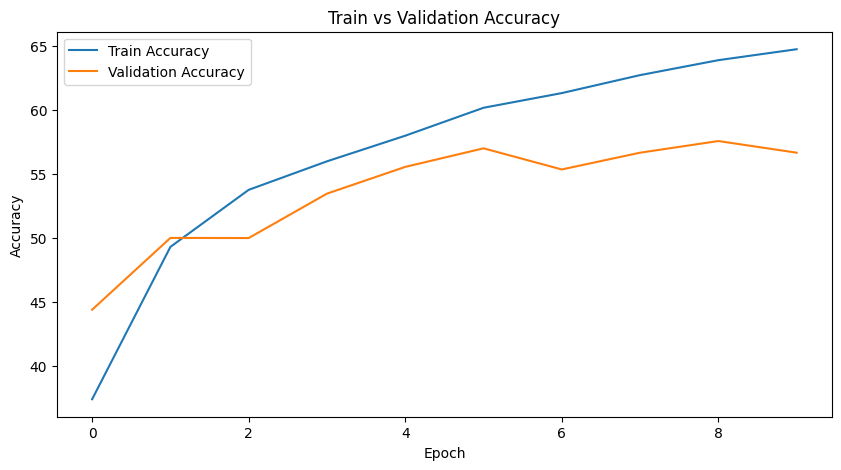

In [6]:
transformations = T.Compose([
    # To tensor automatically normalizes between 0 and 1
    T.ToTensor()
])

dataset = torchvision.datasets.CIFAR10(root='data/', download=True, transform=transformations)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False)

train(train_loader=train_loader, test_loader=test_loader)


Plot how the accuracy (i.e. percentage of correctly classified images) of your model evolves for both, the training- and test-set of CIFAR10. Please make sure to add meaningful axis labels for your plot (y-axis as
the accuracy and x-axis as the epoch number).

What do you observe in the accuracy plot, in particular if you compare the train and test accuracy? Do you have an explanation for that?

### I observe that the train and test accuracies started to diverge and the divergence gets bigger from epoch to epoch. It is prone to overfitting. And also since the batches are not normalized, there are fluctuations in accuracy during the training process.

### 3.4 Augmentation

Please apply random horizontal flipping, random cropping with padding=4, and ColorJitter to the CIFAR10 images and visualize a few pairs of augmented images against their original.

Files already downloaded and verified


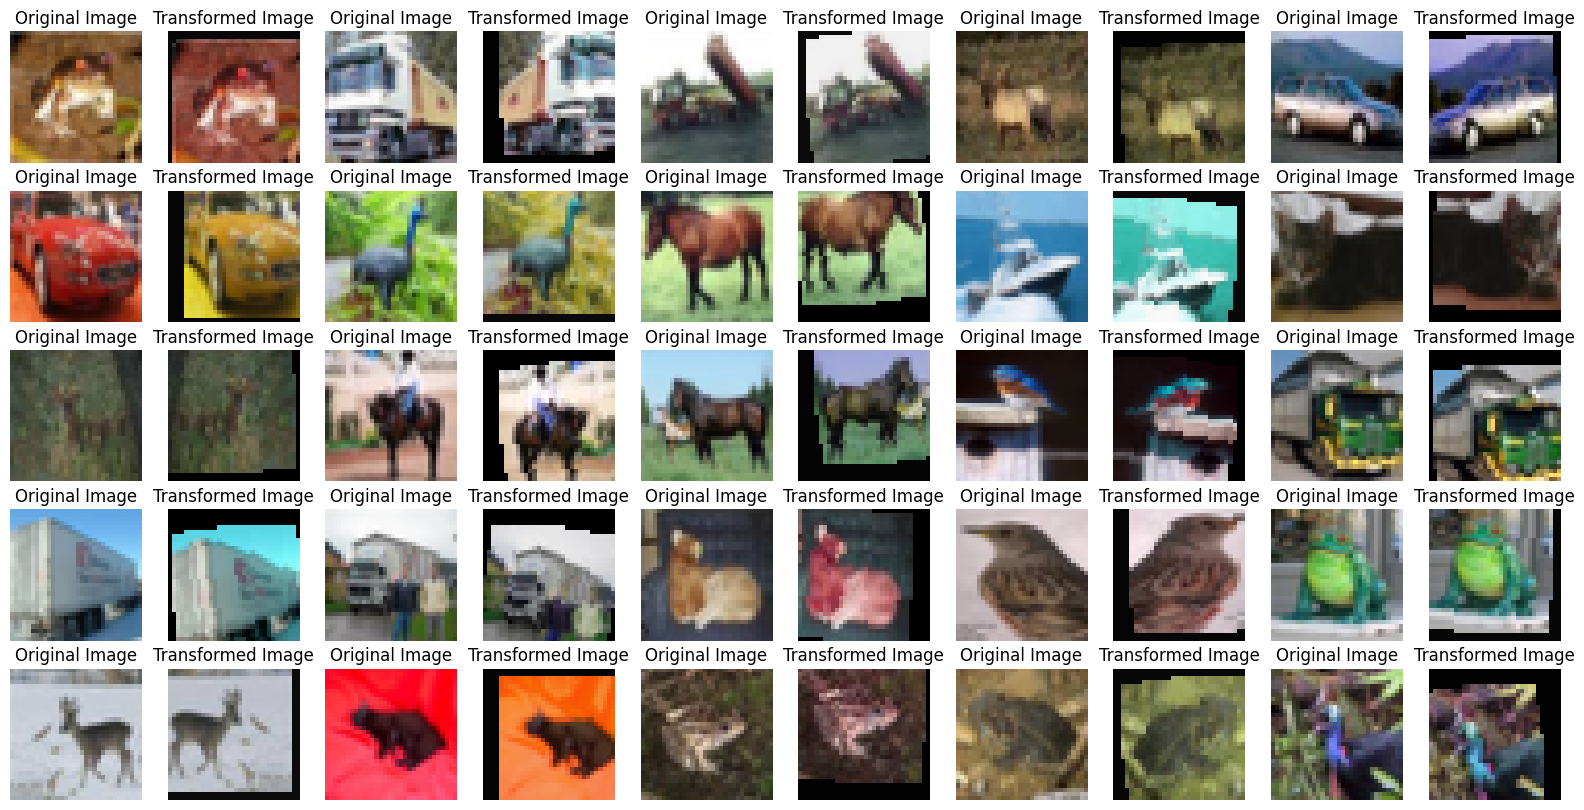

In [8]:
# Transformations without the normalization, for demonstration purposes
transformations = T.Compose([
    # To tensor automatically normalizes between 0 and 1
    T.ToTensor(),
    T.RandomRotation(10),
    T.RandomHorizontalFlip(),
    T.RandomCrop(32, padding=4),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)
])

transformed_dataset = torchvision.datasets.CIFAR10(root='data/', download=True, transform=transformations)

transformed_train_set, transformed_test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

transformed_train_loader = torch.utils.data.DataLoader(transformed_train_set, batch_size=16, shuffle=True)
transformed_test_loader = torch.utils.data.DataLoader(transformed_test_set, batch_size=16, shuffle=False)

plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 10, i*2+1)
    original_img = dataset[i][0].permute(1, 2, 0)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(5, 10, i*2+2)
    transformed_img = transformed_dataset[i][0].permute(1, 2, 0)
    plt.imshow(transformed_img)
    plt.axis('off')
    plt.title('Transformed Image')



Train your model using the same setup as above, however, with additional normalization (normalize your input images channel-wise using μ = 0.5 and σ = 0.5) and data augmentation.

Files already downloaded and verified


100%|██████████| 2500/2500 [00:40<00:00, 62.10it/s]


Epoch 1/10, Train Loss: 1.7447, Train Accuracy: 35.28%


100%|██████████| 625/625 [00:07<00:00, 88.89it/s] 


Epoch 1/10, Validation Loss: 1.5651, Validation Accuracy: 43.27%


100%|██████████| 2500/2500 [00:37<00:00, 66.27it/s]


Epoch 2/10, Train Loss: 1.5217, Train Accuracy: 44.31%


100%|██████████| 625/625 [00:06<00:00, 98.89it/s] 


Epoch 2/10, Validation Loss: 1.5346, Validation Accuracy: 43.95%


100%|██████████| 2500/2500 [00:39<00:00, 63.59it/s]


Epoch 3/10, Train Loss: 1.4503, Train Accuracy: 47.39%


100%|██████████| 625/625 [00:06<00:00, 92.74it/s]


Epoch 3/10, Validation Loss: 1.4193, Validation Accuracy: 48.00%


100%|██████████| 2500/2500 [00:38<00:00, 64.47it/s]


Epoch 4/10, Train Loss: 1.4109, Train Accuracy: 49.09%


100%|██████████| 625/625 [00:06<00:00, 94.55it/s]


Epoch 4/10, Validation Loss: 1.4053, Validation Accuracy: 48.42%


100%|██████████| 2500/2500 [00:38<00:00, 64.91it/s]


Epoch 5/10, Train Loss: 1.3713, Train Accuracy: 50.45%


100%|██████████| 625/625 [00:06<00:00, 94.72it/s]


Epoch 5/10, Validation Loss: 1.3441, Validation Accuracy: 51.42%


100%|██████████| 2500/2500 [00:38<00:00, 65.05it/s]


Epoch 6/10, Train Loss: 1.3362, Train Accuracy: 51.84%


100%|██████████| 625/625 [00:06<00:00, 95.94it/s]


Epoch 6/10, Validation Loss: 1.3139, Validation Accuracy: 52.61%


100%|██████████| 2500/2500 [00:38<00:00, 65.11it/s]


Epoch 7/10, Train Loss: 1.3115, Train Accuracy: 52.80%


100%|██████████| 625/625 [00:06<00:00, 95.94it/s]


Epoch 7/10, Validation Loss: 1.3177, Validation Accuracy: 52.37%


100%|██████████| 2500/2500 [00:38<00:00, 65.05it/s]


Epoch 8/10, Train Loss: 1.2952, Train Accuracy: 53.47%


100%|██████████| 625/625 [00:06<00:00, 96.15it/s]


Epoch 8/10, Validation Loss: 1.2869, Validation Accuracy: 53.85%


100%|██████████| 2500/2500 [00:38<00:00, 65.00it/s]


Epoch 9/10, Train Loss: 1.2747, Train Accuracy: 54.30%


100%|██████████| 625/625 [00:08<00:00, 75.70it/s]


Epoch 9/10, Validation Loss: 1.2746, Validation Accuracy: 54.69%


100%|██████████| 2500/2500 [00:48<00:00, 51.03it/s]


Epoch 10/10, Train Loss: 1.2619, Train Accuracy: 54.68%


100%|██████████| 625/625 [00:06<00:00, 89.60it/s]


Epoch 10/10, Validation Loss: 1.2701, Validation Accuracy: 54.86%


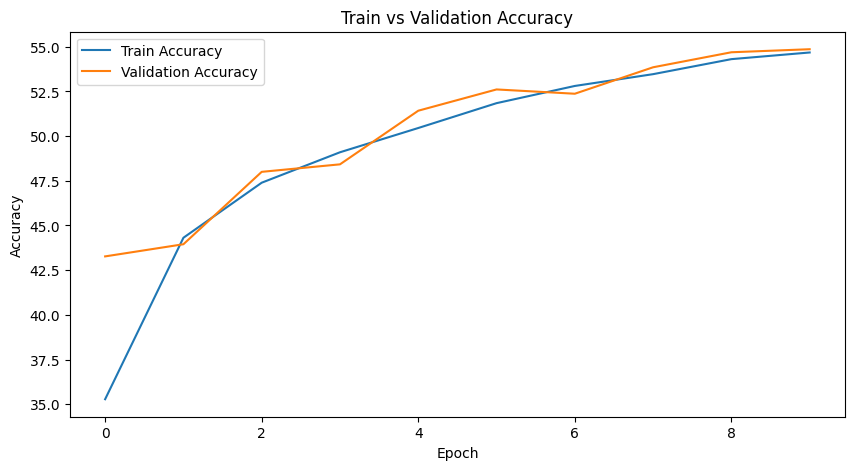

In [15]:
transformations = T.Compose([
    # To tensor automatically normalizes between 0 and 1
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    T.RandomRotation(10),
    T.RandomHorizontalFlip(),
    T.RandomCrop(32, padding=4)
])

transformed_dataset = torchvision.datasets.CIFAR10(root='data/', download=True, transform=transformations)

transformed_train_set, transformed_test_set = torch.utils.data.random_split(transformed_dataset, [train_size, test_size])

transformed_train_loader = torch.utils.data.DataLoader(transformed_train_set, batch_size=16, shuffle=True)
transformed_test_loader = torch.utils.data.DataLoader(transformed_test_set, batch_size=16, shuffle=False)

train(train_loader = transformed_train_loader, test_loader = transformed_test_loader)

Plot the accuracy of this model and the one you trained before over time. Make sure to use proper axis labels and a meaningful legend.

Based on your results, provide a brief discussion of why the extra normalization and augmentation improves/harms the performance of your model.

The overfitting issue seemed to be solved with these regularization terms. The fluctuation in the curves got less due to the normalization. Since we made the training set more complicated, the training accuracy decreased in 10 epochs. We can counter this by increasing the number of epochs, or playing with the learning rate. However it seems good for now. Furthermore, the val accuracy exceeds the train accuracy at some points. This can happen due to train set being more complicated then the val set. Also it harmed the accuracy performance in val set around 2%, or 3%.

---
## Task 4: Activation and Saliency Maps

In this task, we will try to visualize what CNNs learn by means of the activation
map, which is considered to be more informative than just visualizing e.g. the
kernel weights.

### 4.1 Instantiate a pre-traind ResNet18

In [16]:
from torchvision.models import resnet18
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

############ your code here ############
# Instantiate your model ResNet18
# turn the model into evaluation mode
# and print out the architecture 

model = resnet18(pretrained=True).to(device)
model.eval()
print(model)
############ end of your code############

c:\Users\kutay\miniconda3\envs\deepl\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kutay\miniconda3\envs\deepl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 4.2 Intermediate Activation Maps

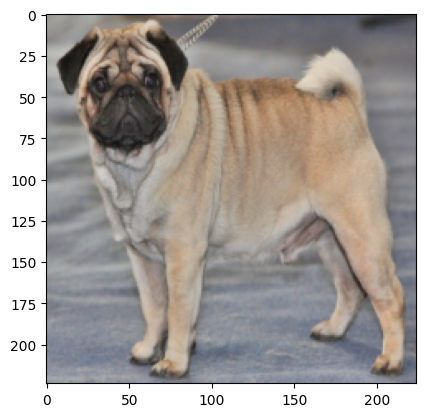

In [17]:
# check for gpu

# load the provided image and get the output
image = Image.open('pug.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

def show_tensor(tensor):
    if tensor.ndim == 4:
        temp = tensor.squeeze()
    else: temp=tensor
    plt.imshow(temp.cpu().permute(1,2,0))

show_tensor(X.squeeze())



Store intermediate activation maps..


In [18]:
"Got this information and partially the code from https://web.stanford.edu/~nanbhas/blog/forward-hooks-pytorch/"
activation = {}

def get_activation(name):
    def hook(module, input, output):
        activation[name] = output.detach()
    return hook

h1 = model.conv1.register_forward_hook(get_activation('conv1'))
h2 = model.layer1[0].conv1.register_forward_hook(get_activation('layer1_0_conv1'))

X = X.to(device)
output = model(X)   

h1.remove()
h2.remove()

print("Conv1 shape: \t\t", activation["conv1"].shape)
print("Layer1 conv1 shape: \t", activation["layer1_0_conv1"].shape)


Conv1 shape: 		 torch.Size([1, 64, 112, 112])
Layer1 conv1 shape: 	 torch.Size([1, 64, 56, 56])


### 4.3 Visualize the Activation Maps

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


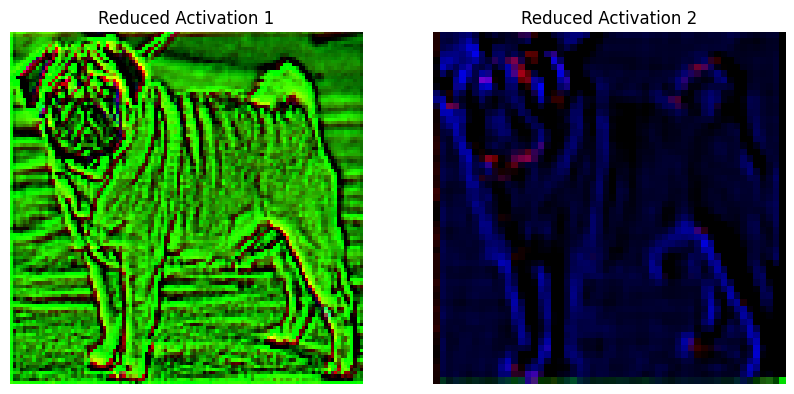

In [86]:
"""
    I wanted to try 1x1 convolutions to reduce the number of channels in the intermediate activations
"""

activation_1 = activation['conv1']
activation_2 = activation['layer1_0_conv1']

conv1x1 = nn.Conv2d(in_channels=activation_1.shape[1], out_channels=3, kernel_size=1).to(device)
with torch.no_grad():
    conv1x1.weight.data = model.layer1[0].conv1.weight.data[:3]
reduced_activation_1 = conv1x1(activation_1).detach().cpu().numpy()
reduced_activation_2 = conv1x1(activation_2).detach().cpu().numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(reduced_activation_1[0].transpose(1, 2, 0)) 
plt.title('Reduced Activation 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reduced_activation_2[0].transpose(1, 2, 0)) 
plt.title('Reduced Activation 2')
plt.axis('off')

plt.show()


I had the dimensionality problem for conv1 and layer1 conv 1 due to them having the channel size 64. I chose to use 1x1 convolutions to be able to shrink the dimension. What I see here, as the convolutions get deeper, the image becomes less distinguishable, while the most important features, such as edges and the shape of the animal gets highlighted.

### 4.4 Plot Image and Activation Map

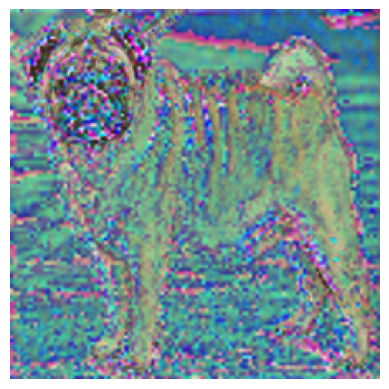

In [87]:
activation_map = reduced_activation_1[0].transpose(1, 2, 0)
activation_map = Image.fromarray((activation_map * 255).astype(np.uint8))
activation_map = activation_map.resize((224, 224))

image = Image.open("pug.jpg").resize((224, 224))  # Load and resize the original image
mask = activation_map.split()[-1]

image.paste(activation_map, (0, 0), mask)
plt.imshow(image)
plt.axis('off')
plt.show()




It is still distinguishable from the human eye, however, with it's most important features. Since it is a dog, we can see it's dog shape in general. its rounded ears, and it's pug face, however the details are not as sharp as we see in the real world. This is because of how convolutions work as a feature extractor. They give the most important features of the object. We obviously can see that this is a dog, and it is a pug, but we don't see the color of it's eyes to be more precise.

### 4.5 Saliency Map
Introduced in: *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps*

In [14]:
# illustrate how gather() works
def gather_example():
    N, C = 4, 5
    s = torch.randn(N, C)
    y = torch.LongTensor([1, 2, 1, 3])
    print(s)
    print(y)
    print(s.gather(1, y.view(-1, 1)).squeeze())
gather_example()

# load the images
names = ['catdog_243.png', 'catdog_243.png', 'snake_56.png', 'spider_72.png']

X = [np.array(Image.open(name).convert('RGB')) for name in names]
y = [int(s.rsplit('_')[1].rsplit('.')[0]) for s in names]

# intentionally change the label to a wrong one
y[1] = 285

def preprocess(img, size=224):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Lambda(lambda x: x[None]),  # equivalent to unsqueeze()
    ])
    return transform(img)

tensor([[-0.7402,  0.8353, -0.1003, -1.1791, -0.3943],
        [-0.0363,  0.4059, -0.4060,  2.8080,  0.5574],
        [-0.3704,  0.8314,  1.0007, -0.1945, -1.2402],
        [ 0.3891, -1.9293, -2.4520,  0.1418, -1.3946]])
tensor([1, 2, 1, 3])
tensor([ 0.8353, -0.4060,  0.8314,  0.1418])


#### a) Complete the saliency map function.

In [15]:
def saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; LongTensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()
    
    # Wrap the input tensors in Variables
    X_var = X.clone().detach()
    X_var.requires_grad = True
    y_var = y.clone().detach()
    saliency = None

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image. You first want to compute the loss over the correct   #
    # scores, and then compute the gradients with a backward pass.               #
    ##############################################################################
    X_var = X_var.to(device)
    y_var = y_var.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    scores = model(X_var)
    loss = criterion(scores, y_var)
    optimizer.zero_grad()
    loss.backward(retain_graph=True)

    # I took the gradients wrt the
    gradients = torch.autograd.grad(loss, X_var)[0]
    saliency = gradients.abs().max(dim=1)[0]
    saliency = saliency.cpu().detach()


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency


#### b) Visualize the original images together with the saliency maps.

Visualize the original image with the saliency maps together and provide a short discussion on why different ground truth labels with even the same input image would yield different saliency maps, for instance, the catdog_243.png image with y = 243 (bull mastiff) and y = 285 (Egyptian cat).

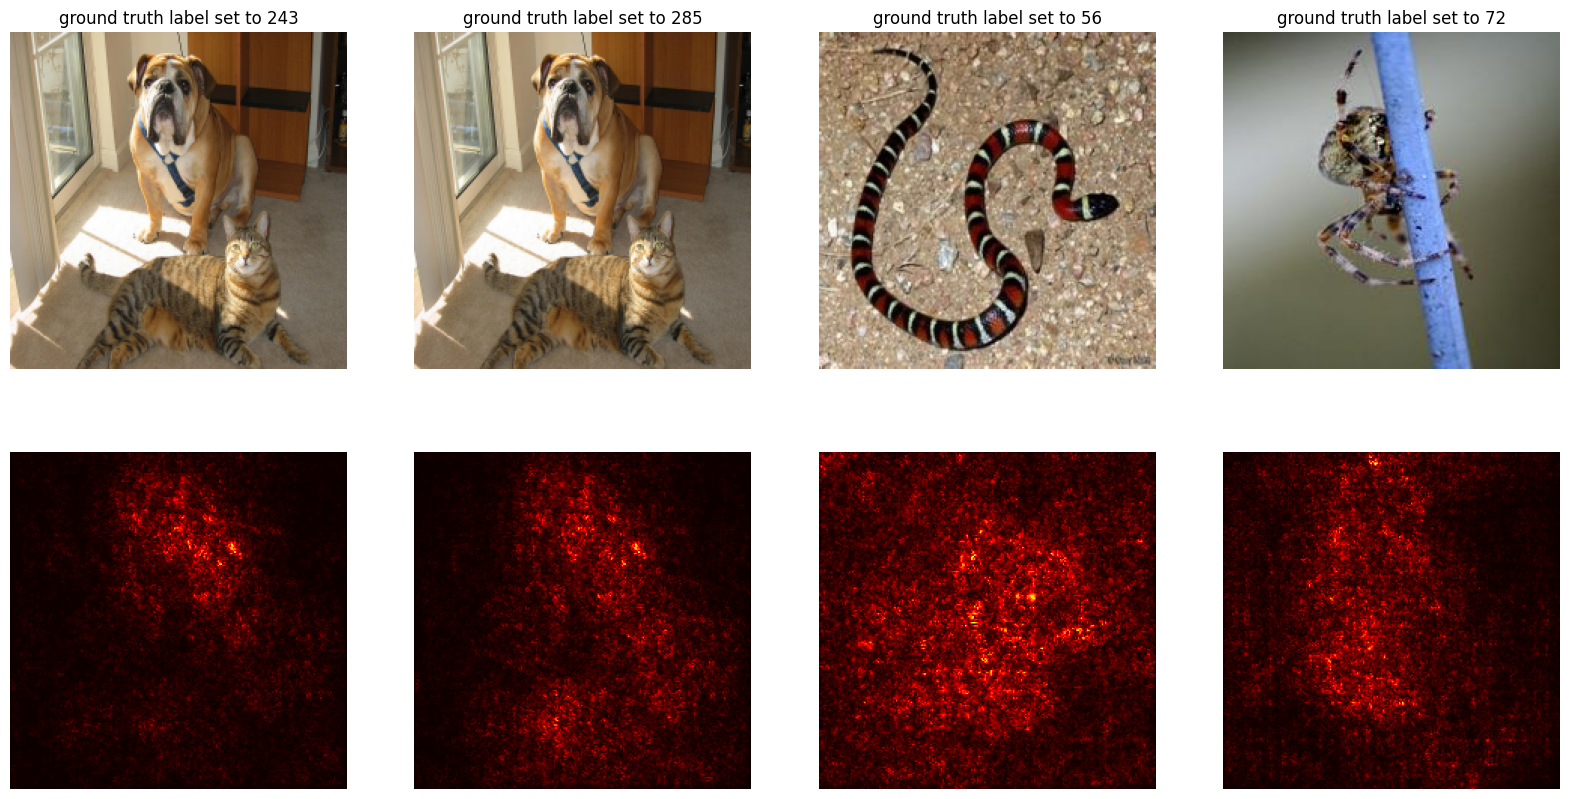

In [16]:
# Please use the same pre-trained network from the previous task for this task
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet18(pretrained=True).to(device)

# if you finished the task 3.1 and defined your model, then this function should run flawlessly
def show_saliency_maps(X, y):
    # Convert X and y from numpy arrays to Torch Tensors
    X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
    y_tensor = torch.LongTensor(y)
    # Compute saliency maps for images in X
    saliency = saliency_maps(X_tensor, y_tensor, model)

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    saliency = saliency.numpy()
    N = len(X)
    for i in range(N):
        plt.subplot(2, N, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
        plt.title('ground truth label set to {}'.format(y[i]))
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(20, 10)
    plt.show()

show_saliency_maps(X, y)

---

The saliency map gets distributed when we change the ground truth due to the penalization difference of the loss function. The CNN still captures the important parts, however this time, since it cannot get enough to correctly guess, it looks to the other parts of the data, which makes it distributed to the whole image as it can see above from the second image.